In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AQI project/train.csv')
print(data.shape)

(495512, 15)


## EXPLORATORY DATA ANALYSIS

In [ ]:
data.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495512 entries, 0 to 495511
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        495512 non-null  object 
 1   Datetime    495512 non-null  object 
 2   PM2.5       488851 non-null  float64
 3   PM10        484693 non-null  float64
 4   NO          469994 non-null  float64
 5   NO2         489898 non-null  float64
 6   NOx         485090 non-null  float64
 7   NH3         474977 non-null  float64
 8   CO          490495 non-null  float64
 9   SO2         483354 non-null  float64
 10  O3          471898 non-null  float64
 11  Benzene     486993 non-null  float64
 12  Toluene     484508 non-null  float64
 13  Xylene      483352 non-null  float64
 14  AQI_Bucket  495512 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 56.7+ MB


In [ ]:
data.duplicated().any()

False

In [ ]:
data.isnull().sum()

City              0
Datetime          0
PM2.5          6661
PM10          10819
NO            25518
NO2            5614
NOx           10422
NH3           20535
CO             5017
SO2           12158
O3            23614
Benzene        8519
Toluene       11004
Xylene        12160
AQI_Bucket        0
dtype: int64

In [ ]:
data.nunique()

City             26
Datetime      48191
PM2.5          5486
PM10           6926
NO             3347
NO2            2742
NOx            3624
NH3            2787
CO             1671
SO2            1958
O3             2092
Benzene        1333
Toluene        1946
Xylene          895
AQI_Bucket        7
dtype: int64

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
count,488851.000000,484693.000000,469994.000000,489898.000000,485090.000000,474977.000000,490495.000000,483354.000000,471898.000000,486993.000000,484508.000000,483352.000000,495512.000000
mean,67.594300,119.133609,17.400187,28.893296,32.297654,23.605254,2.193791,14.026952,34.826780,3.092229,8.656081,3.114720,3.002131
std,66.518636,79.646784,29.347508,26.634609,36.097291,22.696589,10.491712,17.406665,26.947275,14.433554,17.955378,4.740591,1.999700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,79.600000,4.600000,12.400000,12.800000,12.300000,0.500000,5.600000,16.200000,0.200000,1.200000,2.300000,1.000000
50%,60.400000,119.100000,9.800000,25.300000,26.100000,23.600000,0.900000,10.600000,34.000000,1.800000,7.400000,3.100000,3.000000
75%,68.200000,119.100000,17.400000,31.900000,32.300000,23.600000,2.000000,14.000000,41.600000,3.100000,8.700000,3.100000,5.000000
max,1000.000000,1000.000000,500.000000,499.500000,498.300000,498.500000,498.600000,200.000000,497.600000,498.100000,499.400000,500.000000,6.000000


In [ ]:
data.AQI_Bucket.unique()

array([5, 1, 3, 4, 6, 0, 2])

In [ ]:
data.Datetime = pd.to_datetime(data.Datetime)

### IMPUTATION

In [ ]:
df = data.sort_values(by=['City','Datetime'])
df = data.pivot_table(columns=['City'],values=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI_Bucket'],index='Datetime')
print(df.shape)

(48191, 338)


In [ ]:
df.columns

MultiIndex([('AQI_Bucket',          'Ahmedabad'),
            ('AQI_Bucket',             'Aizawl'),
            ('AQI_Bucket',          'Amaravati'),
            ('AQI_Bucket',           'Amritsar'),
            ('AQI_Bucket',          'Bengaluru'),
            ('AQI_Bucket',             'Bhopal'),
            ('AQI_Bucket',       'Brajrajnagar'),
            ('AQI_Bucket',         'Chandigarh'),
            ('AQI_Bucket',            'Chennai'),
            ('AQI_Bucket',         'Coimbatore'),
            ...
            (    'Xylene',         'Jorapokhar'),
            (    'Xylene',              'Kochi'),
            (    'Xylene',            'Kolkata'),
            (    'Xylene',            'Lucknow'),
            (    'Xylene',             'Mumbai'),
            (    'Xylene',              'Patna'),
            (    'Xylene',           'Shillong'),
            (    'Xylene',            'Talcher'),
            (    'Xylene', 'Thiruvananthapuram'),
            (    'Xylene',      'V

In [ ]:
df_sorted = df.sort_values(by=['Datetime'])

In [ ]:
df_sorted

AQI_Bucket                                             \
City                 Ahmedabad Aizawl Amaravati Amritsar Bengaluru Bhopal   
Datetime                                                                    
2015-01-01 01:00:00        NaN    NaN       NaN      NaN       NaN    NaN   
2015-01-01 02:00:00        4.0    NaN       NaN      NaN       NaN    NaN   
2015-01-01 03:00:00        0.0    NaN       NaN      NaN       NaN    NaN   
2015-01-01 04:00:00        2.0    NaN       NaN      NaN       NaN    NaN   
2015-01-01 05:00:00        NaN    NaN       NaN      NaN       NaN    NaN   
...                        ...    ...       ...      ...       ...    ...   
2020-06-30 20:00:00        1.0    NaN       0.0      0.0       0.0    0.0   
2020-06-30 21:00:00        2.0    0.0       4.0      2.0       0.0    3.0   
2020-06-30 22:00:00        NaN    0.0       0.0      2.0       0.0    0.0   
2020-06-30 23:00:00        5.0    0.0       4.0      0.0       3.0    4.0   
2020-07-01 00:00:00        NaN    NaN       NaN      6.0       6.0    6.0   

                                                                ...  \
City                Brajrajnagar Chandigarh Chennai Coimbatore  ...   
Datetime                                                        ...   
2015-01-01 01:00:00          NaN        NaN     5.0        NaN  ...   
2015-01-01 02:00:00          NaN        NaN     1.0        NaN  ...   
2015-01-01 03:00:00          NaN        NaN     6.0        NaN  ...   
2015-01-01 04:00:00          NaN        NaN     NaN        NaN  ...   
2015-01-01 05:00:00          NaN        NaN     3.0        NaN  ...   
...                          ...        ...     ...        ...  ...   
2020-06-30 20:00:00          NaN        4.0     1.0        0.0  ...   
2020-06-30 21:00:00          NaN        5.0     2.0        2.0  ...   
2020-06-30 22:00:00          NaN        1.0     5.0        2.0  ...   
2020-06-30 23:00:00          5.0        5.0     4.0        NaN  ...   
2020-07-01 00:00:00          4.0        NaN     5.0        6.0  ...   

                        Xylene                                              \
City                Jorapokhar Kochi Kolkata Lucknow Mumbai Patna Shillong   
Datetime                                                                     
2015-01-01 01:00:00        NaN   NaN     NaN     NaN    0.0   NaN      NaN   
2015-01-01 02:00:00        NaN   NaN     NaN     3.1    NaN   NaN      NaN   
2015-01-01 03:00:00        NaN   NaN     NaN     3.1    0.0   NaN      NaN   
2015-01-01 04:00:00        NaN   NaN     NaN     3.1    0.0   NaN      NaN   
2015-01-01 05:00:00        NaN   NaN     NaN     3.1    0.0   NaN      NaN   
...                        ...   ...     ...     ...    ...   ...      ...   
2020-06-30 20:00:00        3.1   3.1     0.4     3.1    3.1   3.1      3.1   
2020-06-30 21:00:00        NaN   3.1     0.4     3.1    NaN   NaN      3.1   
2020-06-30 22:00:00        3.1   3.1     0.3     3.1    3.1   NaN      3.1   
2020-06-30 23:00:00        3.1   NaN     0.2     NaN    3.1   2.7      NaN   
2020-07-01 00:00:00        3.1   NaN     NaN     3.1    3.1   2.1      3.1   

                                                              
City                Talcher Thiruvananthapuram Visakhapatnam  
Datetime                                                      
2015-01-01 01:00:00     NaN                NaN           NaN  
2015-01-01 02:00:00     NaN                NaN           NaN  
2015-01-01 03:00:00     NaN                NaN           NaN  
2015-01-01 04:00:00     NaN                NaN           NaN  
2015-01-01 05:00:00     NaN                NaN           NaN  
...                     ...                ...           ...  
2020-06-30 20:00:00     NaN                NaN           3.1  
2020-06-30 21:00:00     NaN                3.1           3.1  
2020-06-30 22:00:00     3.1                3.1           3.1  
2020-06-30 23:00:00     3.1                3.1           3.1  
2020-07-01 00:00:00     3.1       

In [ ]:
df_sorted.isnull().sum()

            City              
AQI_Bucket  Ahmedabad             14528
            Aizawl                46334
            Amaravati             32303
            Amritsar              27687
            Bengaluru             14513
                                  ...  
Xylene      Patna                 17711
            Shillong              43145
            Talcher               33107
            Thiruvananthapuram    29980
            Visakhapatnam         24242
Length: 338, dtype: int64

In [ ]:
# imputation using forward and backward fill

df_sorted = df_sorted.fillna(method='bfill')
df_sorted = df_sorted.fillna(method='ffill')

In [ ]:
df_sorted.isnull().sum()

            City              
AQI_Bucket  Ahmedabad             0
            Aizawl                0
            Amaravati             0
            Amritsar              0
            Bengaluru             0
                                 ..
Xylene      Patna                 0
            Shillong              0
            Talcher               0
            Thiruvananthapuram    0
            Visakhapatnam         0
Length: 338, dtype: int64

In [ ]:
df_agg_delhi = pd.DataFrame(columns=['City'])
df_agg_delhi= df_sorted.xs(key='Delhi', level='City', axis=1, drop_level=True)
df_agg_delhi.loc[:, 'City'] = 'Delhi'
print(df_agg_delhi.shape)

(48191, 14)


<ipython-input-19-03bfa810282c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_delhi.loc[:, 'City'] = 'Delhi'


In [ ]:
df_agg_delhi.head()

,AQI_Bucket,Benzene,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene,City
Datetime,,,,,,,,,,,,,,
2015-01-01 01:00:00,2.0,25.2,9.3,27.5,81.5,41.8,187.7,54.9,935.2,454.6,3.4,58.6,13.8,Delhi
2015-01-01 02:00:00,5.0,19.0,29.7,28.9,132.5,41.2,141.0,19.3,119.1,409.1,2.8,38.9,17.2,Delhi
2015-01-01 03:00:00,5.0,19.0,29.7,28.9,132.5,41.2,141.0,19.3,119.1,409.1,2.8,38.9,17.2,Delhi
2015-01-01 04:00:00,3.0,14.0,21.8,29.3,84.8,39.6,102.8,20.1,119.1,436.1,6.2,27.5,16.8,Delhi
2015-01-01 05:00:00,0.0,11.1,26.2,30.8,60.2,37.4,80.1,16.0,977.0,415.9,6.2,22.0,14.3,Delhi


In [ ]:
df_agg_delhi.isnull().sum()

AQI_Bucket    0
Benzene       0
CO            0
NH3           0
NO            0
NO2           0
NOx           0
O3            0
PM10          0
PM2.5         0
SO2           0
Toluene       0
Xylene        0
City          0
dtype: int64

In [ ]:
df_agg_delhi = df_agg_delhi.sort_values(['Datetime'])

In [ ]:
DF = df_agg_delhi
cities = [x for x in data.City.unique() if x not in ['Delhi']]
df_agg_city = pd.DataFrame(columns=['City'])
from tqdm import tqdm
for city in tqdm(cities):
    df_agg_city = df_sorted.xs(key=city, level='City', axis=1, drop_level=True)
    df_agg_city.loc[:, 'City'] = city
    df_agg_city = df_agg_city.sort_values(['Datetime'])
    df_agg_city = df_agg_city.fillna(method='ffill')
    df_agg_city = df_agg_city.fillna(method='bfill')
    DF = pd.concat([DF,df_agg_city],axis=0)

  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-23-6beaded6103d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_city.loc[:, 'City'] = city
<ipython-input-23-6beaded6103d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_city.loc[:, 'City'] = city
<ipython-input-23-6beaded6103d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
DF.shape

(1252966, 14)

In [ ]:
DF.isnull().sum()

AQI_Bucket    0
Benzene       0
CO            0
NH3           0
NO            0
NO2           0
NOx           0
O3            0
PM10          0
PM2.5         0
SO2           0
Toluene       0
Xylene        0
City          0
dtype: int64

In [ ]:
DF=DF.reset_index()

In [ ]:
DF.columns

Index(['Datetime', 'AQI_Bucket', 'Benzene', 'CO', 'NH3', 'NO', 'NO2', 'NOx',
       'O3', 'PM10', 'PM2.5', 'SO2', 'Toluene', 'Xylene', 'City'],
      dtype='object')

In [ ]:
DF.Datetime.dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

## DATA VISUALISATION

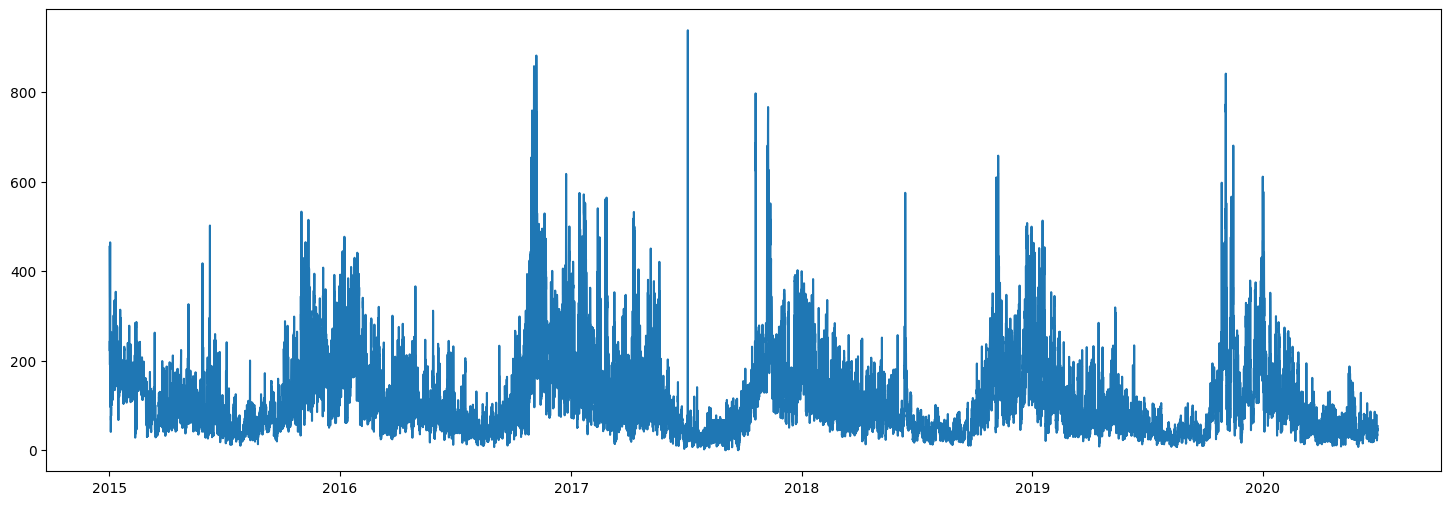

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['PM2.5'])
plt.show()

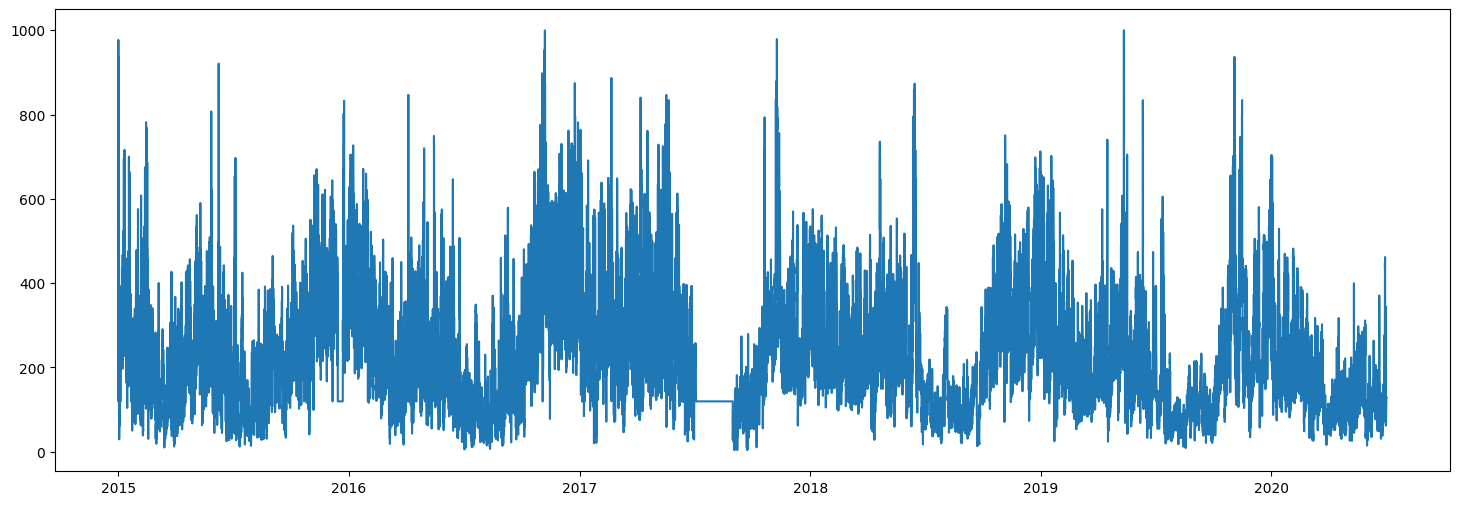

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['PM10'])
plt.show()

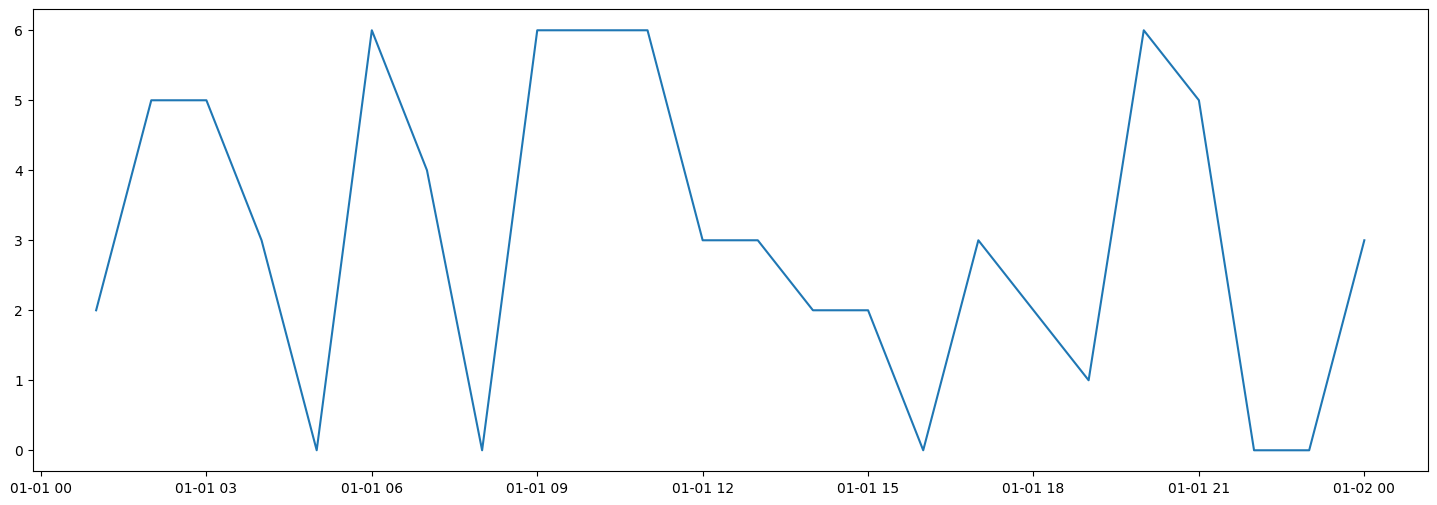

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'][:24],DF[DF.City=='Delhi']['AQI_Bucket'][:24])
plt.show()

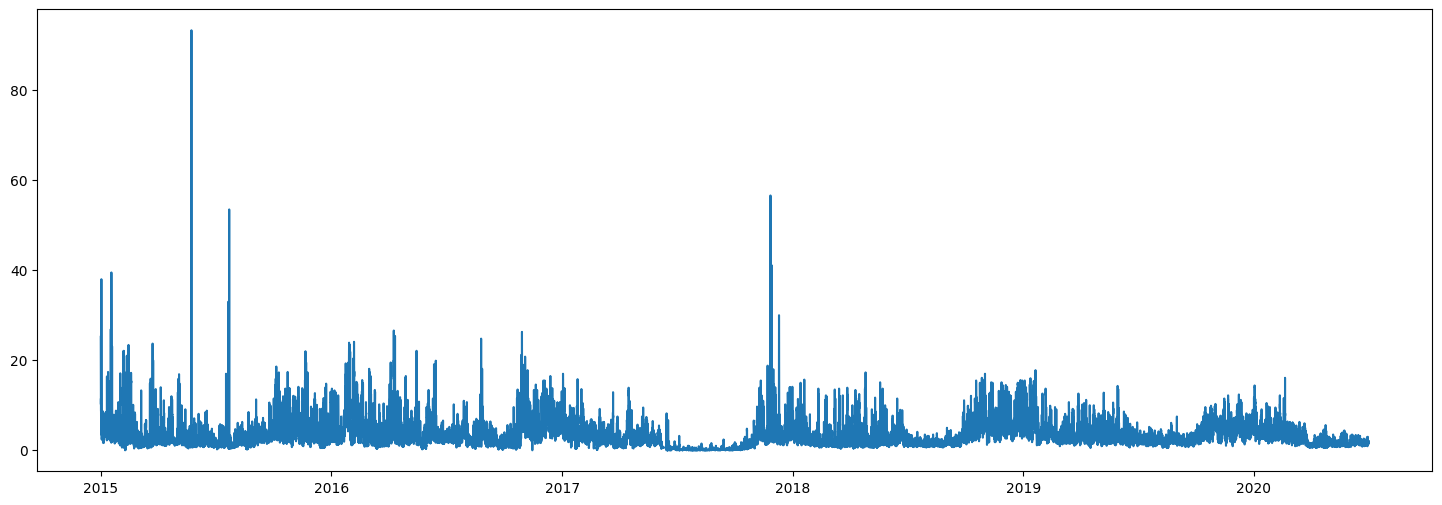

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['Benzene'])
plt.show()

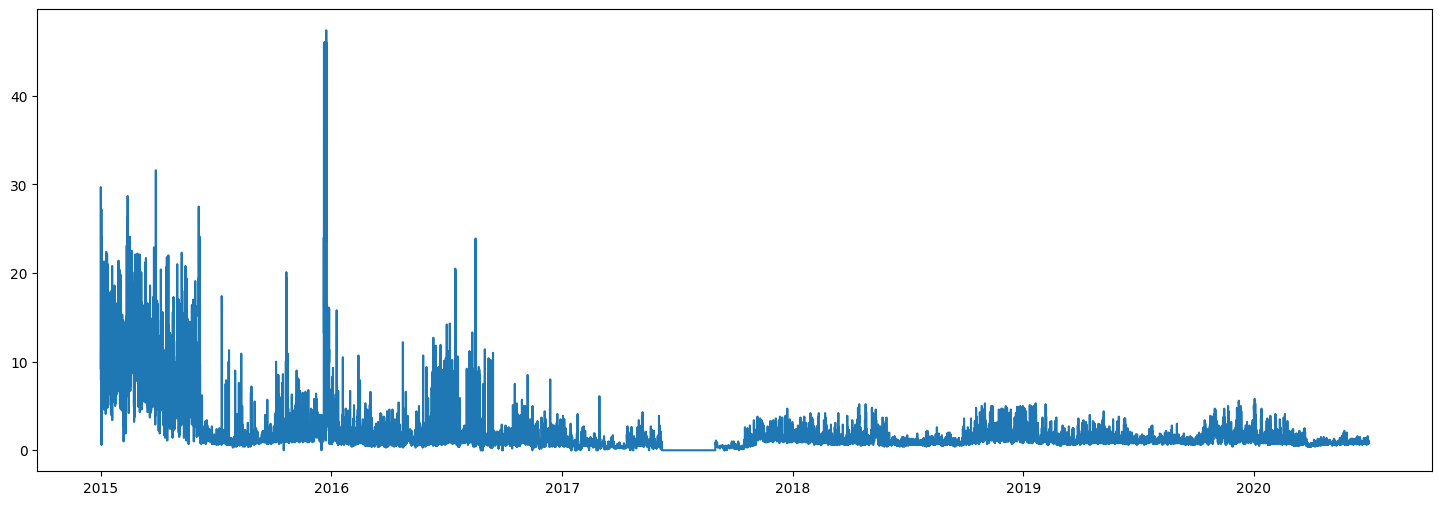

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['CO'])
plt.show()

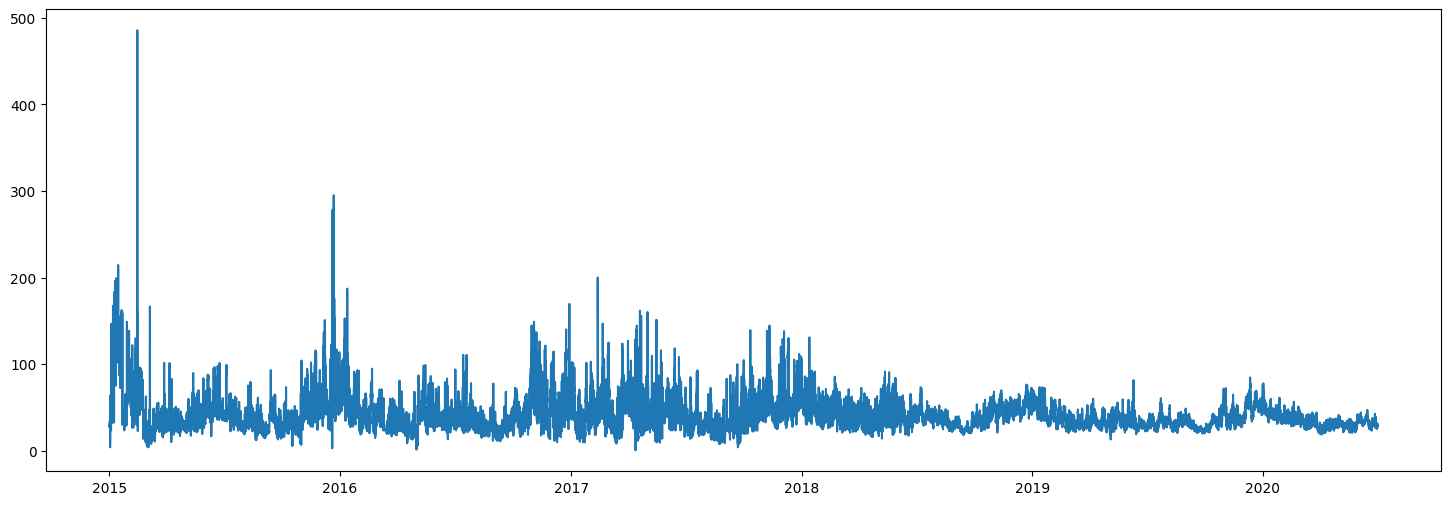

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['NH3'])
plt.show()

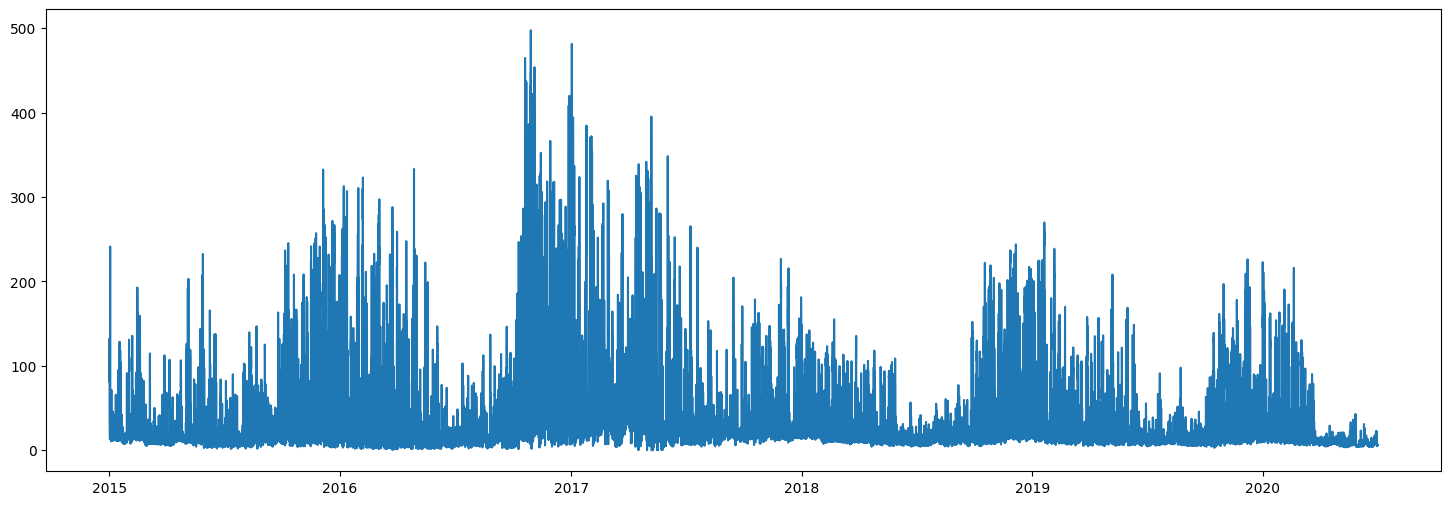

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['NO'])
plt.show()

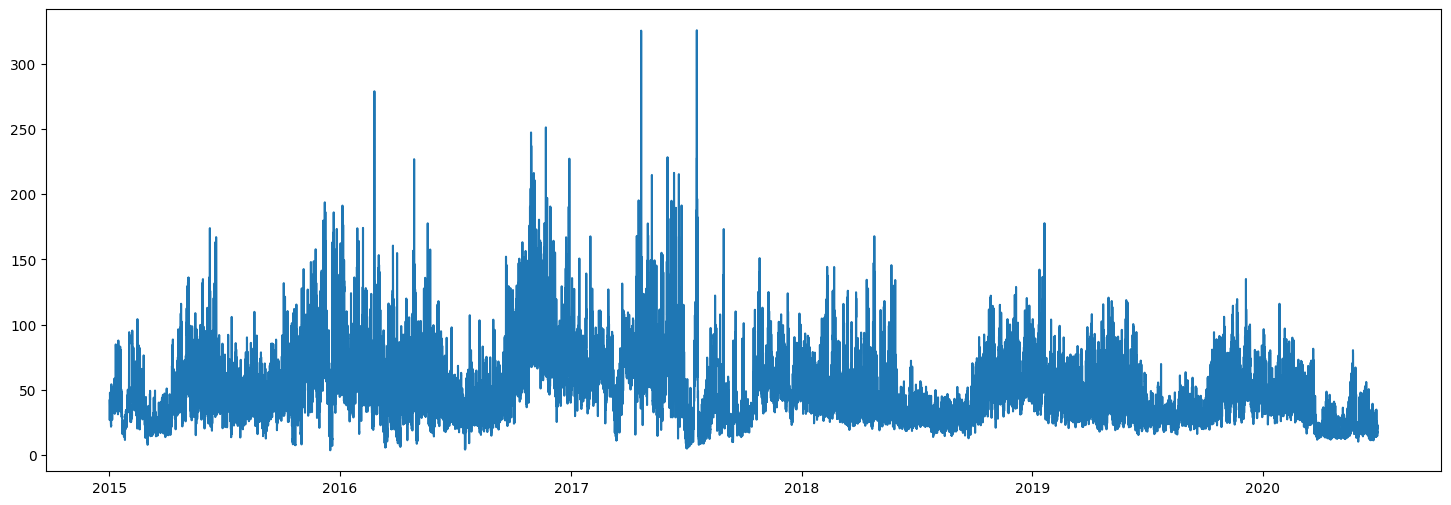

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['NO2'])
plt.show()

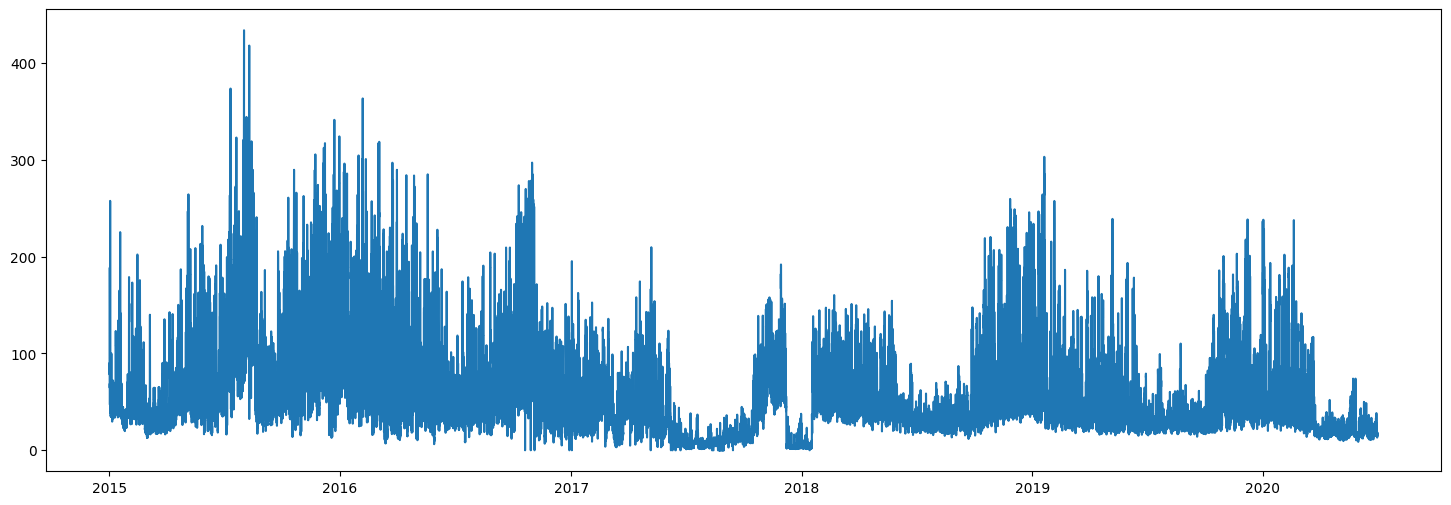

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['NOx'])
plt.show()

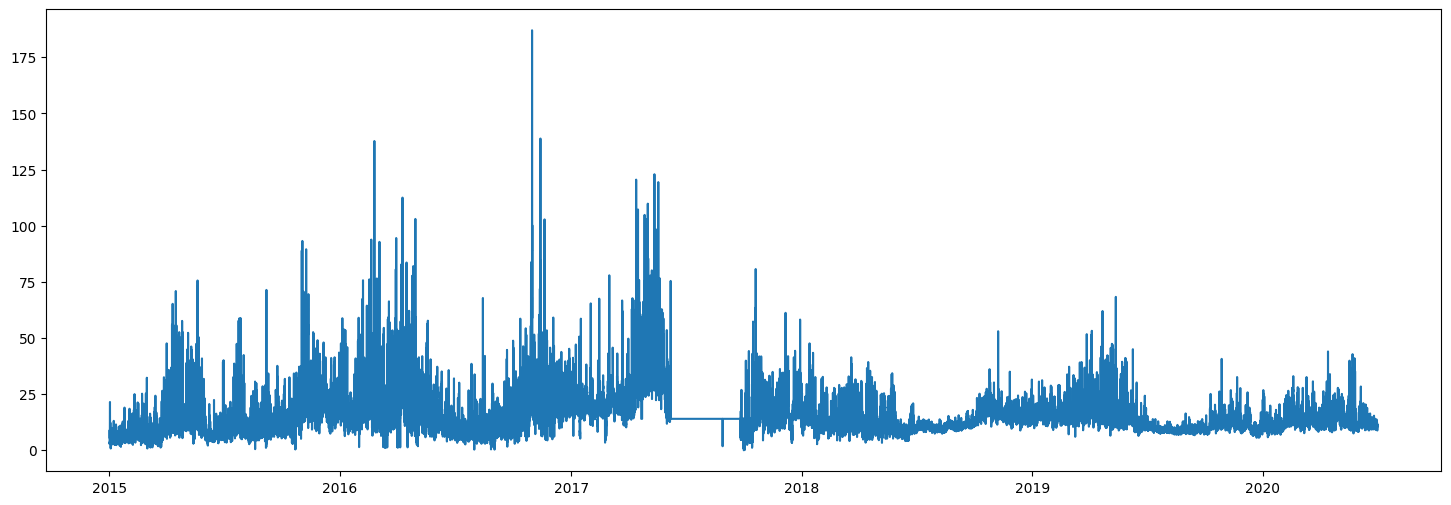

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['SO2'])
plt.show()

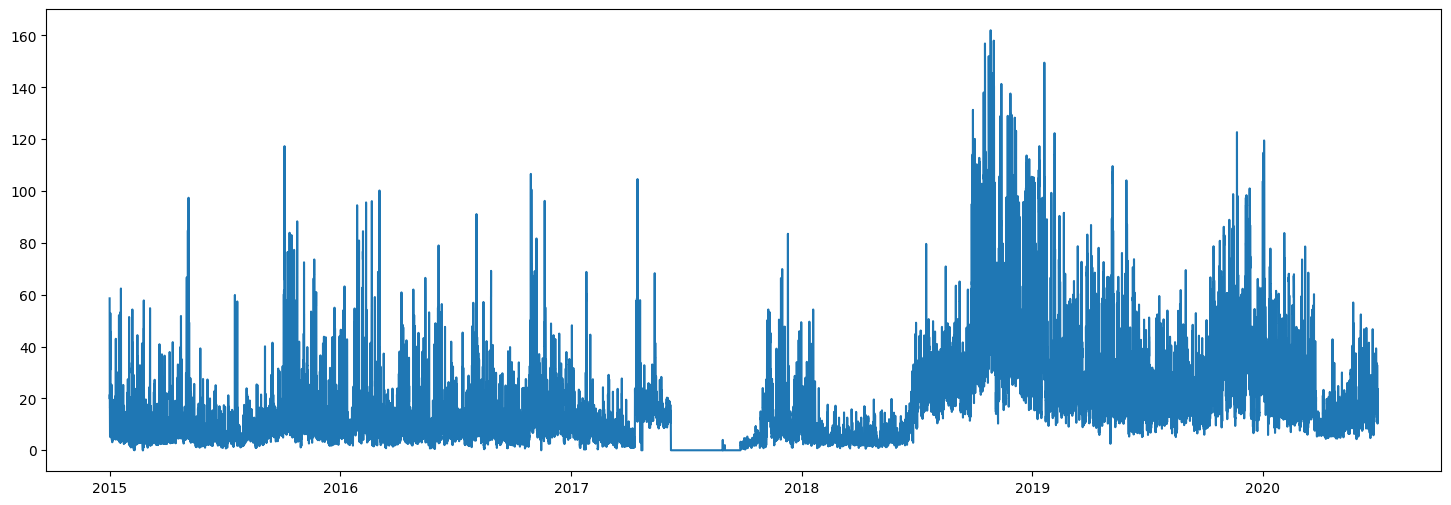

In [ ]:

plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['Toluene'])
plt.show()

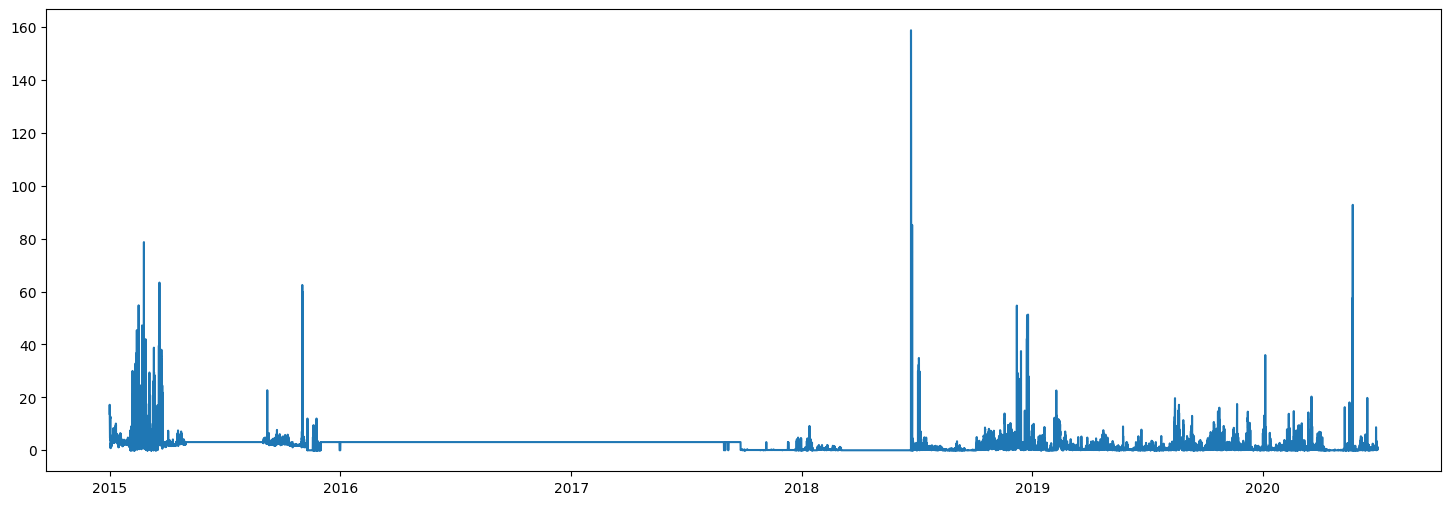

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(DF[DF.City=='Delhi']['Datetime'],DF[DF.City=='Delhi']['Xylene'])
plt.show()

### FEATURE ENGINEERING

In [ ]:
DF['year'] = DF.Datetime.dt.year
DF['month'] = DF.Datetime.dt.month
DF['day'] = DF.Datetime.dt.day
DF['dayofweek'] = DF.Datetime.dt.dayofweek
DF['weekend'] = DF.dayofweek.apply(lambda x: '0' if x<5 else '1')
DF['hour'] = DF.Datetime.dt.hour
DF.year = DF.year.apply(lambda x: x-2015)+1

In [ ]:
DF = DF.drop(['Datetime'],axis=1)

In [ ]:
DF.shape

(1252966, 20)

In [ ]:
split_size = int(0.80*(DF.shape[0]))
df_train = DF[:split_size]
df_test = DF[split_size:]
print(df_train.shape,df_test.shape)

(1002372, 20) (250594, 20)


In [ ]:

df_train['hour_Cos'] = np.cos(2*np.pi*df_train['hour']/df_train['hour'].max())
df_train['hour_Sin'] = np.sin(2*np.pi*df_train['hour']/df_train['hour'].max())

df_test['hour_Cos'] = np.cos(2*np.pi*df_test['hour']/df_test['hour'].max())
df_test['hour_Sin'] = np.sin(2*np.pi*df_test['hour']/df_test['hour'].max())

<ipython-input-45-ed62cccb7842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['hour_Cos'] = np.cos(2*np.pi*df_train['hour']/df_train['hour'].max())
<ipython-input-45-ed62cccb7842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['hour_Sin'] = np.sin(2*np.pi*df_train['hour']/df_train['hour'].max())
<ipython-input-45-ed62cccb7842>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
df_train['month_Cos'] = np.cos(2*np.pi*df_train['month']/df_train['month'].max())
df_train['month_Sin'] = np.sin(2*np.pi*df_train['month']/df_train['month'].max())

df_test['month_Cos'] = np.cos(2*np.pi*df_test['month']/df_test['month'].max())
df_test['month_Sin'] = np.sin(2*np.pi*df_test['month']/df_test['month'].max())

<ipython-input-46-aed438a64979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['month_Cos'] = np.cos(2*np.pi*df_train['month']/df_train['month'].max())
<ipython-input-46-aed438a64979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['month_Sin'] = np.sin(2*np.pi*df_train['month']/df_train['month'].max())
<ipython-input-46-aed438a64979>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
# creating bins for NO

df_train['NO_bins'] = df_train.NO.apply(lambda x: '0' if x<500 else '1')
df_test['NO_bins'] = df_test.NO.apply(lambda x: '0' if x<500 else '1')

<ipython-input-47-e16c3e7a0d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NO_bins'] = df_train.NO.apply(lambda x: '0' if x<500 else '1')
<ipython-input-47-e16c3e7a0d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NO_bins'] = df_test.NO.apply(lambda x: '0' if x<500 else '1')


In [ ]:
# creating bins for NO2

df_train['NO2_bins'] = df_train.NO2.apply(lambda x: '0' if x<500 else '1')
df_test['NO2_bins'] = df_test.NO2.apply(lambda x: '0' if x<500 else '1')

<ipython-input-48-38dab977e28e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NO2_bins'] = df_train.NO2.apply(lambda x: '0' if x<500 else '1')
<ipython-input-48-38dab977e28e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NO2_bins'] = df_test.NO2.apply(lambda x: '0' if x<500 else '1')


In [ ]:
# creating bins for NOx

df_train['NOx_bins'] = df_train.NOx.apply(lambda x: '0' if x<500 else '1')
df_test['NOx_bins'] = df_test.NOx.apply(lambda x: '0' if x<500 else '1')

<ipython-input-49-e01b7500bbb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NOx_bins'] = df_train.NOx.apply(lambda x: '0' if x<500 else '1')
<ipython-input-49-e01b7500bbb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NOx_bins'] = df_test.NOx.apply(lambda x: '0' if x<500 else '1')


In [ ]:
# creating bins for NH3

df_train['NH3_bins'] = df_train.NH3.apply(lambda x: '0' if x<500 else '1')
df_test['NH3_bins'] = df_test.NH3.apply(lambda x: '0' if x<500 else '1')

<ipython-input-50-97522a56d5c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NH3_bins'] = df_train.NH3.apply(lambda x: '0' if x<500 else '1')
<ipython-input-50-97522a56d5c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NH3_bins'] = df_test.NH3.apply(lambda x: '0' if x<500 else '1')


In [ ]:
# creating bins for CO

df_train['CO_bins'] = df_train.CO.apply(lambda x: '0' if x<500 else '1')
df_test['CO_bins'] = df_test.CO.apply(lambda x: '0' if x<500 else '1')

<ipython-input-51-abb4b5fbe650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CO_bins'] = df_train.CO.apply(lambda x: '0' if x<500 else '1')
<ipython-input-51-abb4b5fbe650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CO_bins'] = df_test.CO.apply(lambda x: '0' if x<500 else '1')


In [ ]:
bins = [-1,300,400,600]
labels = ['0', '1', '2']
df_train['O3_bins'] = pd.cut(df_train.O3,bins=bins,labels=labels).astype('object')
df_test['O3_bins'] = pd.cut(df_test.O3,bins=bins,labels=labels).astype('object')

<ipython-input-52-6bf821e5dc10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['O3_bins'] = pd.cut(df_train.O3,bins=bins,labels=labels).astype('object')
<ipython-input-52-6bf821e5dc10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['O3_bins'] = pd.cut(df_test.O3,bins=bins,labels=labels).astype('object')


In [ ]:
df_train['Benzene_bins'] = df_train.Benzene.apply(lambda x: '0' if x<500 else '1')
df_test['Benzene_bins'] = df_test.Benzene.apply(lambda x: '0' if x<500 else '1')

<ipython-input-53-8b97a2d6f947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Benzene_bins'] = df_train.Benzene.apply(lambda x: '0' if x<500 else '1')
<ipython-input-53-8b97a2d6f947>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Benzene_bins'] = df_test.Benzene.apply(lambda x: '0' if x<500 else '1')


In [ ]:
bins = [-1,200,300,400,600]
labels = ['0', '1', '2','3']
df_train['Xylene_bins'] = pd.cut(df_train.Xylene,bins=bins,labels=labels).astype('object')
df_test['Xylene_bins'] = pd.cut(df_test.Xylene,bins=bins,labels=labels).astype('object')

<ipython-input-54-131f946e0228>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Xylene_bins'] = pd.cut(df_train.Xylene,bins=bins,labels=labels).astype('object')
<ipython-input-54-131f946e0228>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Xylene_bins'] = pd.cut(df_test.Xylene,bins=bins,labels=labels).astype('object')


In [ ]:
df_train['Toluene_bins'] = df_train.Toluene.apply(lambda x: '0' if x<500 else '1')
df_test['Toluene_bins'] = df_test.Toluene.apply(lambda x: '0' if x<500 else '1')

<ipython-input-55-1e24e1e0b0a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Toluene_bins'] = df_train.Toluene.apply(lambda x: '0' if x<500 else '1')
<ipython-input-55-1e24e1e0b0a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Toluene_bins'] = df_test.Toluene.apply(lambda x: '0' if x<500 else '1')


In [ ]:
df_train.columns

Index(['AQI_Bucket', 'Benzene', 'CO', 'NH3', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM2.5', 'SO2', 'Toluene', 'Xylene', 'City', 'year', 'month', 'day',
       'dayofweek', 'weekend', 'hour', 'hour_Cos', 'hour_Sin', 'month_Cos',
       'month_Sin', 'NO_bins', 'NO2_bins', 'NOx_bins', 'NH3_bins', 'CO_bins',
       'O3_bins', 'Benzene_bins', 'Xylene_bins', 'Toluene_bins'],
      dtype='object')

### FEATURE SELECTION

In [ ]:
num = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene','hour_Cos','hour_Sin','month_Cos','month_Sin','year','month','day','dayofweek','hour']
nom = ['City','weekend','NO_bins', 'NO2_bins', 'NOx_bins', 'NH3_bins', 'CO_bins','O3_bins', 'Benzene_bins', 'Xylene_bins', 'Toluene_bins']

In [ ]:
X_num = df_train[num]
X_nom = df_train[nom]

X1_num = df_test[num]
X1_nom = df_test[nom]

In [ ]:
y = df_train['AQI_Bucket']

Feature 0: 7370.092343
Feature 1: 12984.228858
Feature 2: 258.777330
Feature 3: 4166.765638
Feature 4: 2825.759740
Feature 5: 4245.857697
Feature 6: 275.027747
Feature 7: 1466.107492
Feature 8: 5716.991228
Feature 9: 377.900467
Feature 10: 2893.655063
Feature 11: 155.875080
Feature 12: 2.468785
Feature 13: 1.725955
Feature 14: 13.372476
Feature 15: 67.258614
Feature 16: 2704.233820
Feature 17: 43.043508
Feature 18: 3.216773
Feature 19: 0.701685
Feature 20: 0.618593


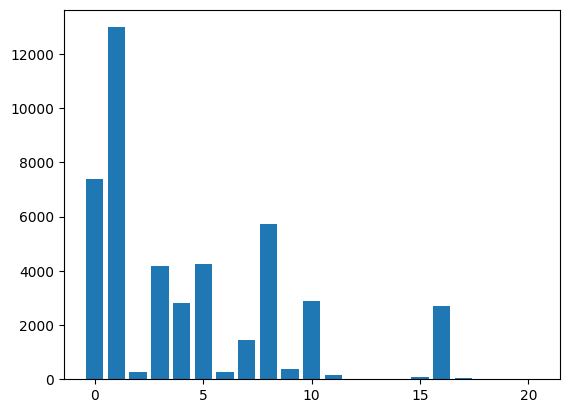

In [ ]:
# ANOVA F-Test : Selecting Categorical Features for Num Targets OR Numerical Features For Categorical Targets

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=9)
fs.fit(X_num, y)
X_num_fs = fs.transform(X_num)
X1_num_fs = fs.transform(X1_num)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


(1002372, 1) (250594, 1)
Feature 0: 180868.198444
Feature 1: 2.205976
Feature 2: 7.934991
Feature 3: nan
Feature 4: nan
Feature 5: nan
Feature 6: nan
Feature 7: 9.827625
Feature 8: nan
Feature 9: 9.433797
Feature 10: nan


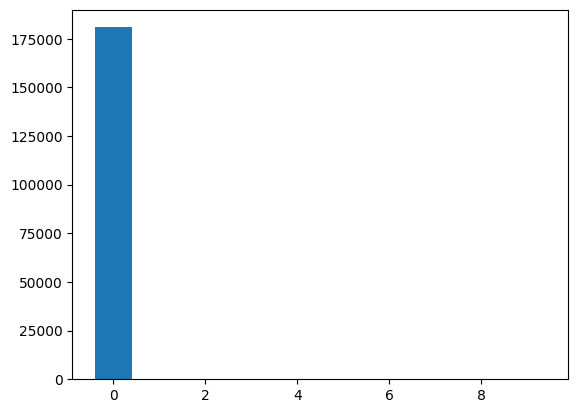

In [ ]:
# Chi Squared feature selection : Selecting Categorical(Nominal) Features for Categorical targets

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# convert features to string
oe.fit(pd.concat([X_nom,X1_nom],axis=0))
X_nom_oe = oe.transform(X_nom)
X1_nom_oe = oe.transform(X1_nom)
# feature selection
fs_nom = SelectKBest(score_func=chi2, k=1)
fs_nom.fit(X_nom_oe, y)
X_nom_fs = fs_nom.transform(X_nom)
X1_nom_fs = fs_nom.transform(X1_nom)
print(X_nom_fs.shape,X1_nom_fs.shape)
# what are scores for the features
for i in range(len(fs_nom.scores_)):
    print('Feature %d: %f' % (i, fs_nom.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_nom.scores_))], fs_nom.scores_)
plt.show()


In [ ]:
df_train.columns

Index(['AQI_Bucket', 'Benzene', 'CO', 'NH3', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM2.5', 'SO2', 'Toluene', 'Xylene', 'City', 'year', 'month', 'day',
       'dayofweek', 'weekend', 'hour', 'hour_Cos', 'hour_Sin', 'month_Cos',
       'month_Sin', 'NO_bins', 'NO2_bins', 'NOx_bins', 'NH3_bins', 'CO_bins',
       'O3_bins', 'Benzene_bins', 'Xylene_bins', 'Toluene_bins'],
      dtype='object')

### ONE HOT ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,drop='first')
ohe.fit(np.concatenate([X_nom_fs,X1_nom_fs],axis=0))
X_nom_ohe = ohe.transform(X_nom_fs)
X1_nom_ohe = ohe.transform(X1_nom_fs)
print(X_nom_ohe.shape, X1_nom_ohe.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1002372, 25) (250594, 25)


### DATA PREPARATION

In [ ]:
X_final= np.concatenate([X_num_fs,X_nom_ohe],axis=1)
X1_final= np.concatenate([X1_num_fs,X1_nom_ohe],axis=1)
print(X_final.shape, X1_final.shape)

(1002372, 34) (250594, 34)


In [ ]:
X_test=X1_final
y_test=df_test['AQI_Bucket']
print(X_test.shape,y_test.shape)

(250594, 34) (250594,)


In [ ]:
# Train Val Test Split

val_split = int(0.80*(X_final.shape[0]))
X_train = X_final[:val_split]
y_train = y[:val_split]

X_val = X_final[val_split:]
y_val = y[val_split:]
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(801897, 34) (200475, 34) (801897,) (200475,)


In [ ]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(801897, 34) (200475, 34) (250594, 34) (801897,) (200475,) (250594,)


### DATA SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_val_scaled =  mm.transform(X_val)
X_test_scaled = mm.transform(X_test)
print(X_train_scaled.shape,X_val_scaled.shape,X_test_scaled.shape)

(801897, 34) (200475, 34) (250594, 34)


### MODEL BUILDING

In [ ]:
past=6
future=1

In [ ]:
# Prepare
X_train_prep = []
y_train_prep = []
for i in range(past,(X_train_scaled.shape[0]-future+1)):
    X_train_prep.append(X_train_scaled[i-past:i+1])
    y_train_prep.append(y_train[i:i+future])
X_train_prep = np.array(X_train_prep)
y_train_prep = np.array(y_train_prep).flatten()
print(X_train_prep.shape, y_train_prep.shape)

(801891, 7, 34) (801891,)


In [ ]:
# Prepare
X_val_prep = []
y_val_prep = []
for i in range(past,(X_val_scaled.shape[0]-future+1)):
    X_val_prep.append(X_val_scaled[i-past:i+1])
    y_val_prep.append(y_val[i:i+future])
X_val_prep = np.array(X_val_prep)
y_val_prep = np.array(y_val_prep).flatten()
#y_prep = y_prep.reshape(y_prep.shape[0], y_prep.shape[2])
print(X_val_prep.shape, y_val_prep.shape)

(200469, 7, 34) (200469,)


In [ ]:
# Prepare Test
X_test_prep = []
y_test_prep = []
for i in range(past,(X_test_scaled.shape[0]-future+1)):
    X_test_prep.append(X_test_scaled[i-past:i+1])
    y_test_prep.append(y_test[i:i+future])
X_test_prep = np.array(X_test_prep)
y_test_prep = np.array(y_test_prep).flatten()
print(X_test_prep.shape, y_test_prep.shape)

(250588, 7, 34) (250588,)


In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.8/584.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 102.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing insta

In [ ]:
# Neural Network : Structured Data (Forward Walk)
import autokeras as ak
input_layer = ak.Input()
conv_layer = ak.ConvBlock()(input_layer)
rnn_layer = ak.RNNBlock()(conv_layer)
output_layer = ak.RegressionHead()(rnn_layer)
model = ak.AutoModel(inputs=input_layer, outputs=output_layer, overwrite=True,max_trials=5,metrics=['mae'])

Using TensorFlow backend


In [ ]:
# Train : Neural Network
model.fit(X_train_prep,y_train_prep, validation_data = (X_val_prep, y_val_prep))
best_model = model.export_model()
best_model.save('/content/drive/MyDrive/AQI project/RNN_CNN_model')

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 34)]           0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 7, 34)             0         
 at32)                                                           
                                                                 
 conv1d (Conv1D)             (None, 5, 32)             3296      
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 32)             0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 512)            49664 

In [ ]:
import autokeras as ak
from tensorflow.keras.models import load_model
model =load_model('/content/drive/MyDrive/AQI project/RNN_CNN_model',custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
y_pred = model.predict(X_test_prep).reshape(-1)

7831/7831 [==============================] - 34s 4ms/step


In [ ]:
print(y_pred.shape,y_test_prep.shape)

(250588,) (250588,)


In [ ]:
y_pred.dtype

dtype('float32')

In [ ]:
y_test_prep.dtype

dtype('float64')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

mse = mean_squared_error(y_pred, y_test_prep.astype('float32'))
mae = mean_absolute_error(y_pred, y_test_prep.astype('float32'))

print('MSE: ', mse)
print('MAE: ', mae)

MSE:  3.0412087
MAE:  1.4944539
